In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/asteroids.csv'

In [ ]:
ast = pd.read_csv('/asteroids.csv')

In [ ]:
# Assuming 'Hazardous' column contains 'Y' for hazardous and 'N' for non-hazardous
# Replace 'Y' and 'N' with the actual values in your dataset if different
ast['Hazardous_Label'] = ast['Hazardous'].apply(lambda x: 1 if x == 'TRUE' else 0)


In [ ]:
# Summary statistics
print(ast.describe())

        Epoch (TDB)  Orbit Axis (AU)  Orbit Eccentricity  \
count  15635.000000     15635.000000        15635.000000   
mean   57365.394947         1.781002            0.449694   
std     1167.238040         0.603229            0.176000   
min    44221.000000         0.547600            0.004400   
25%    57800.000000         1.323600            0.322700   
50%    57800.000000         1.735500            0.462900   
75%    57800.000000         2.208650            0.572900   
max    57800.000000        21.395400            0.969500   

       Orbit Inclination (deg)  Perihelion Argument (deg)  \
count             15635.000000                15635.00000   
mean                 12.941175                  181.50956   
std                  11.303231                  103.86248   
min                   0.014700                    0.00810   
25%                   4.762450                   92.43535   
50%                   9.197400                  183.31780   
75%                  18.510900  

In [ ]:
ast.drop_duplicates(inplace=True)

In [ ]:
# Handling missing values by filling with the mean of each column
ast.fillna(ast.mean(), inplace=True)

<ipython-input-11-f0d68b977ae5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ast.fillna(ast.mean(), inplace=True)


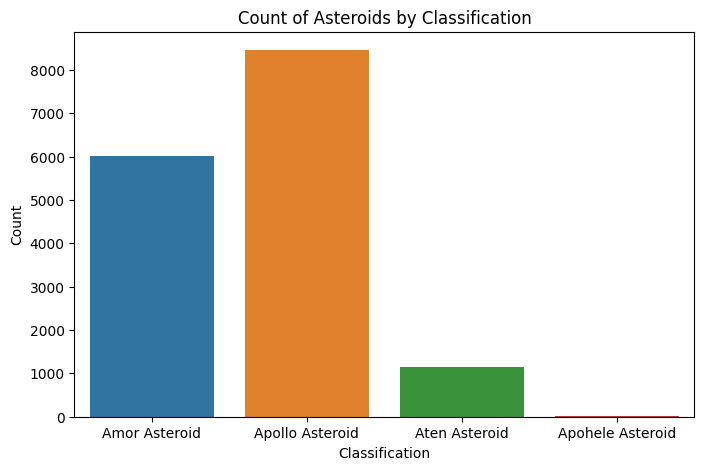

In [ ]:
# Count plot of a categorical feature
plt.figure(figsize=(8, 5))
sns.countplot(x='Classification', data=ast)
plt.title("Count of Asteroids by Classification")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()


In [ ]:
# Define a mapping of original class labels to new labels
class_mapping = {
    'Amor Asteroid': 1,
    'Apollo Asteroid': 2,
    'Aten Asteroid': 3,
    'Apohele Asteroid': 4
}

# Use the replace method to replace the original labels with new labels
ast['Classification'] = ast['Classification'].replace(class_mapping)

# Verify the updated DataFrame
print(ast['Classification'].unique())  # To confirm that the classes are now 1, 2, 3, and 4


[1 2 3 4]


<ipython-input-14-893b46a0f275>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ast.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


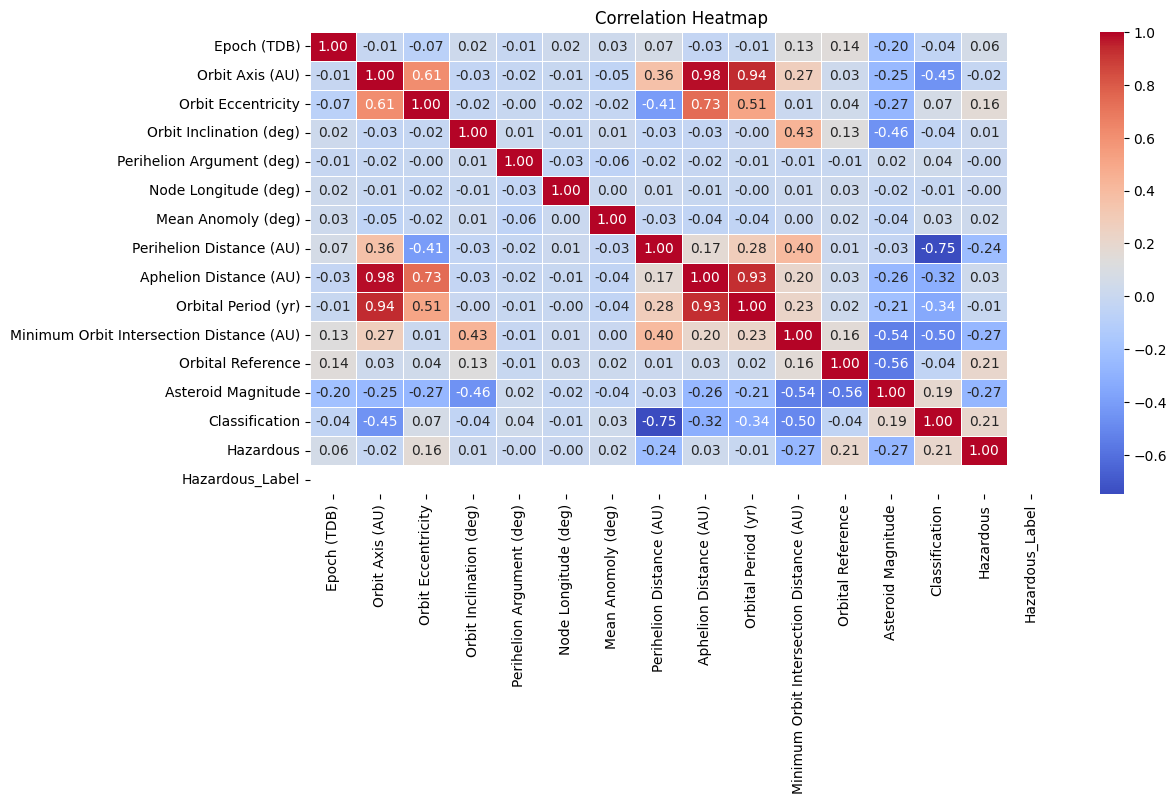

In [ ]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.heatmap(ast.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
aphelion_stats = ast['Aphelion Distance (AU)'].describe()
print("Aphelion Distance Statistics:")
print(aphelion_stats)

Aphelion Distance Statistics:
count    15635.000000
mean         2.647087
std          1.142659
min          0.800000
25%          1.740000
50%          2.520000
75%          3.420000
max         41.540000
Name: Aphelion Distance (AU), dtype: float64


In [ ]:
orbit_axis_stats = ast['Orbit Axis (AU)'].describe()
print("\nOrbit Axis Statistics:")
print(orbit_axis_stats)


Orbit Axis Statistics:
count    15635.000000
mean         1.781002
std          0.603229
min          0.547600
25%          1.323600
50%          1.735500
75%          2.208650
max         21.395400
Name: Orbit Axis (AU), dtype: float64


In [ ]:
# Summary statistics for Orbital Period
orbital_period_stats = ast['Orbital Period (yr)'].describe()
print("\nOrbital Period Statistics:")
print(orbital_period_stats)


Orbital Period Statistics:
count    15635.000000
mean         2.473406
std          1.517588
min          0.410000
25%          1.520000
50%          2.290000
75%          3.280000
max         98.970000
Name: Orbital Period (yr), dtype: float64


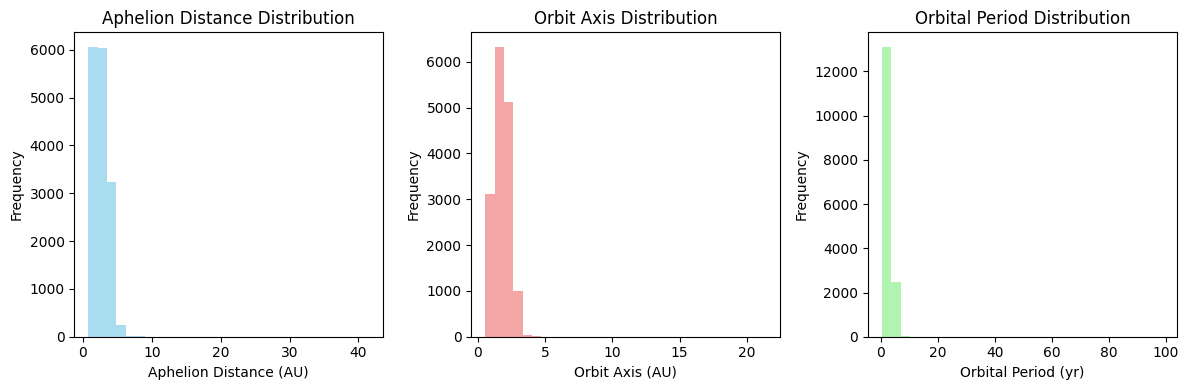

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(ast['Aphelion Distance (AU)'], bins=30, color='skyblue', alpha=0.7)
plt.title("Aphelion Distance Distribution")
plt.xlabel("Aphelion Distance (AU)")
plt.ylabel("Frequency")

plt.subplot(132)
plt.hist(ast['Orbit Axis (AU)'], bins=30, color='lightcoral', alpha=0.7)
plt.title("Orbit Axis Distribution")
plt.xlabel("Orbit Axis (AU)")
plt.ylabel("Frequency")

plt.subplot(133)
plt.hist(ast['Orbital Period (yr)'], bins=30, color='lightgreen', alpha=0.7)
plt.title("Orbital Period Distribution")
plt.xlabel("Orbital Period (yr)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


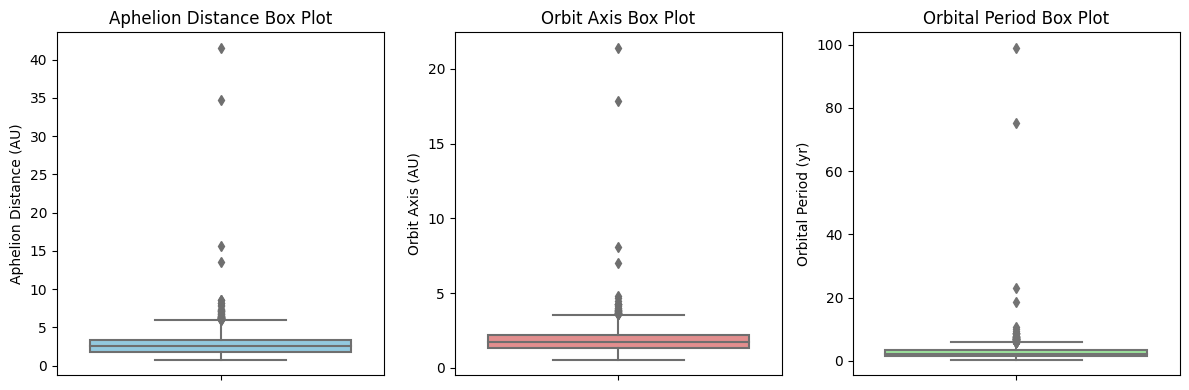

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.boxplot(y='Aphelion Distance (AU)', data=ast, color='skyblue')
plt.title("Aphelion Distance Box Plot")

plt.subplot(132)
sns.boxplot(y='Orbit Axis (AU)', data=ast, color='lightcoral')
plt.title("Orbit Axis Box Plot")

plt.subplot(133)
sns.boxplot(y='Orbital Period (yr)', data=ast, color='lightgreen')
plt.title("Orbital Period Box Plot")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


ast = pd.read_csv('/asteroids.csv')

# outlier removal
features_to_clean = ['Aphelion Distance (AU)', 'Orbit Axis (AU)', 'Orbital Period (yr)']

#constant define
k = 1.5

# Create a new DataFrame to store the cleaned data
ast_cleaned = pd.DataFrame()

# Iterate through each feature and remove outliers
for feature in features_to_clean:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = ast[feature].quantile(0.25)
    Q3 = ast[feature].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier removal
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Remove outliers for the current feature and store in the cleaned DataFrame
    ast_feature_cleaned = ast[(ast[feature] >= lower_bound) & (ast[feature] <= upper_bound)]

    # Add the cleaned feature data to the new DataFrame
    ast_cleaned[feature] = ast_feature_cleaned[feature]

# Reset the index of the cleaned DataFrame
ast_cleaned.reset_index(drop=True, inplace=True)



In [ ]:
# Print the cleaned dataset
print("\nCleaned Dataset ('ast_cleaned'):")
print(ast_cleaned.head())



Cleaned Dataset ('ast_cleaned'):
   Aphelion Distance (AU)  Orbit Axis (AU)  Orbital Period (yr)
0                    1.78           1.4579                 1.76
1                    4.08           2.6385                 4.29
2                    3.88           2.4787                 3.90
3                    4.08           2.6628                 4.35
4                    2.76           1.9191                 2.66


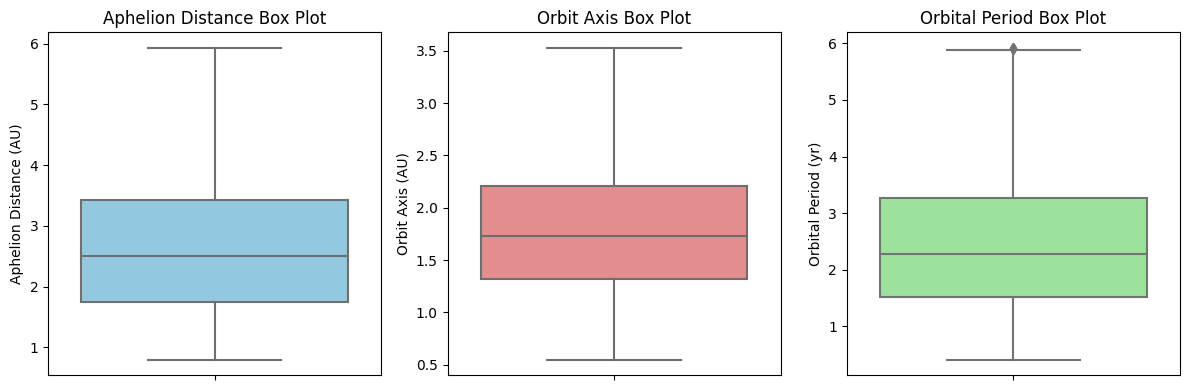

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.boxplot(y='Aphelion Distance (AU)', data=ast_cleaned, color='skyblue')
plt.title("Aphelion Distance Box Plot")

plt.subplot(132)
sns.boxplot(y='Orbit Axis (AU)', data=ast_cleaned, color='lightcoral')
plt.title("Orbit Axis Box Plot")

plt.subplot(133)
sns.boxplot(y='Orbital Period (yr)', data=ast_cleaned, color='lightgreen')
plt.title("Orbital Period Box Plot")

plt.tight_layout()
plt.show()

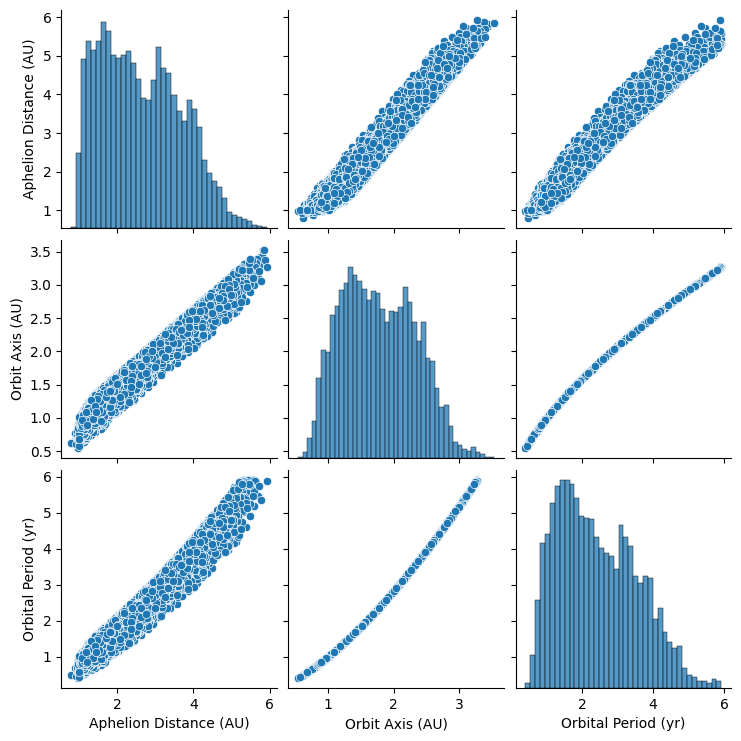

In [ ]:
# Create a pairplot
sns.pairplot(ast_cleaned[['Aphelion Distance (AU)', 'Orbit Axis (AU)', 'Orbital Period (yr)']])
plt.show()


In [ ]:
# Summary statistics
print(ast_cleaned.describe())

       Aphelion Distance (AU)  Orbit Axis (AU)  Orbital Period (yr)
count            15592.000000     15592.000000         15560.000000
mean                 2.630712         1.772899             2.440159
std                  1.041148         0.555610             1.112603
min                  0.800000         0.547600             0.410000
25%                  1.740000         1.322575             1.520000
50%                  2.510000         1.733000             2.280000
75%                  3.420000         2.205400             3.270000
max                  5.930000         3.529100             5.920000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting highly correlated features
selected_features = ['Orbit Axis (AU)', 'Orbital Period (yr)', 'Aphelion Distance (AU)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ast[selected_features], ast['Hazardous'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8883914294851295
Confusion Matrix:
[[2776    7]
 [ 342    2]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94      2783
        True       0.22      0.01      0.01       344

    accuracy                           0.89      3127
   macro avg       0.56      0.50      0.48      3127
weighted avg       0.82      0.89      0.84      3127



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Selecting highly correlated features
selected_features = ['Orbit Axis (AU)', 'Orbital Period (yr)', 'Aphelion Distance (AU)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ast[selected_features], ast['Hazardous'], test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8138791173648865
Confusion Matrix:
[[2463  320]
 [ 262   82]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.89      0.89      2783
        True       0.20      0.24      0.22       344

    accuracy                           0.81      3127
   macro avg       0.55      0.56      0.56      3127
weighted avg       0.83      0.81      0.82      3127

